<a href="https://colab.research.google.com/github/cybermin/orange/blob/main/orange_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화 준비

In [4]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

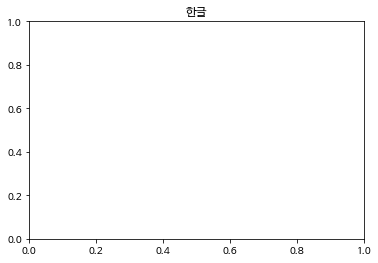

In [2]:
plt.title('한글')
plt.show()

# 1. 데이터 불러오기

In [3]:
#pandas 라이브러리 추가
import pandas as pd

## **판다스를 활용하여 외부 데이터 가져오기**
+ csv 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_csv(‘파일명‘, engine='python')
 - 파일 내용 한글이 깨지는 경우 : df = pd.read_csv(‘파일명‘, engine='python', encoding='cp949')
>
```
df = pd.read_csv(‘파일명‘)
```

+ 엑셀 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_excel(‘파일명‘)
>
```
df = pd.read_excel(‘파일명‘)
```

In [10]:
#데이터 불러오기 (오렌지 : File, Data Table)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')
df.head(2)

,RN_INDI,EXMD_CNT,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_BP_SYS,G1E_BP_DIA,G1E_URN_PROT,G1E_HGB,G1E_FBS,G1E_TOT_CHOL,G1E_SGOT,G1E_SGPT,G1E_GGT
0,1011725,4,2006,171.0,64.0,120,70,2.0,14.8,82,144,14,13,21
1,1011725,4,2008,170.0,65.0,120,80,1.0,14.7,90,156,18,16,18


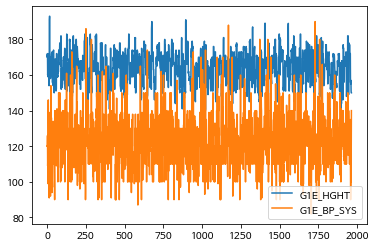

In [42]:
df[['G1E_HGHT', 'G1E_BP_SYS']].plot()
plt.show()

In [11]:
#데이터 구성확인 (오렌지 : File의 type 확인)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RN_INDI       1964 non-null   int64  
 1   EXMD_CNT      1964 non-null   int64  
 2   EXMD_BZ_YYYY  1964 non-null   int64  
 3   G1E_HGHT      1963 non-null   float64
 4   G1E_WGHT      1963 non-null   float64
 5   G1E_BP_SYS    1964 non-null   int64  
 6   G1E_BP_DIA    1964 non-null   int64  
 7   G1E_URN_PROT  1955 non-null   float64
 8   G1E_HGB       1964 non-null   float64
 9   G1E_FBS       1964 non-null   int64  
 10  G1E_TOT_CHOL  1964 non-null   int64  
 11  G1E_SGOT      1964 non-null   int64  
 12  G1E_SGPT      1964 non-null   int64  
 13  G1E_GGT       1964 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 214.9 KB


## **열 타입 변경**


---
+ df.dtypes : 데이터타입 확인
+ df[열명].astype(변환타입)
  + 정수형은 .astype(‘int’)
  + 문자형은 .astype(‘str’)
  + 범주형은 .astype(‘category’)
+ pd.to_numeric(열): 문자열 칼럼의 숫자형 변환 
+ pd.to_datetime(열) : 날짜형식으로 변경

참고) 
+ object와 category의 차이
  + object : 문자열 자료형
  + category : 가능한 값들의 범위가 고정되어있고, 한정적일 때 사용하면 유용

In [12]:
df.columns

Index(['RN_INDI', 'EXMD_CNT', 'EXMD_BZ_YYYY', 'G1E_HGHT', 'G1E_WGHT',
       'G1E_BP_SYS', 'G1E_BP_DIA', 'G1E_URN_PROT', 'G1E_HGB', 'G1E_FBS',
       'G1E_TOT_CHOL', 'G1E_SGOT', 'G1E_SGPT', 'G1E_GGT'],
      dtype='object')

In [13]:
#연도(EXMD_BZ_YYYY)를 범주형 자료로 형변환
df['EXMD_BZ_YYYY'] = df['EXMD_BZ_YYYY'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   RN_INDI       1964 non-null   int64   
 1   EXMD_CNT      1964 non-null   int64   
 2   EXMD_BZ_YYYY  1964 non-null   category
 3   G1E_HGHT      1963 non-null   float64 
 4   G1E_WGHT      1963 non-null   float64 
 5   G1E_BP_SYS    1964 non-null   int64   
 6   G1E_BP_DIA    1964 non-null   int64   
 7   G1E_URN_PROT  1955 non-null   float64 
 8   G1E_HGB       1964 non-null   float64 
 9   G1E_FBS       1964 non-null   int64   
 10  G1E_TOT_CHOL  1964 non-null   int64   
 11  G1E_SGOT      1964 non-null   int64   
 12  G1E_SGPT      1964 non-null   int64   
 13  G1E_GGT       1964 non-null   int64   
dtypes: category(1), float64(4), int64(9)
memory usage: 201.7 KB


## 데이터 기초 통계 확인 
+ df.describe() 
  + 수치형 데이터 기초 통계

+ df.describe(include='object') 
  + 범주형 데이터 기초 통계
  + category형이면 include='category'
    + count	: 전체 개수
    + unique : 중복없이 나오는 데이터개수(범주형 개수)
    + top : 가장 많이 나오는 범주형 자료 (최빈값항목)
    + freq: top자료의 개수

In [14]:
#수치형 데이터 기초 통계
df.describe()

,RN_INDI,EXMD_CNT,G1E_HGHT,G1E_WGHT,G1E_BP_SYS,G1E_BP_DIA,G1E_URN_PROT,G1E_HGB,G1E_FBS,G1E_TOT_CHOL,G1E_SGOT,G1E_SGPT,G1E_GGT
count,1.964000e+03,1964.000000,1963.000000,1963.000000,1964.000000,1964.000000,1955.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000
mean,5.487325e+06,3.179226,163.815079,64.363729,123.024440,76.785642,1.070588,13.985336,96.839613,195.274949,24.946538,24.929735,33.990326
std,2.593309e+06,0.795079,9.553964,11.209621,14.779735,9.768767,0.394602,1.566062,23.255787,36.781809,19.538295,27.891686,37.686475
min,1.011725e+06,2.000000,129.000000,36.000000,82.000000,50.000000,1.000000,5.200000,61.000000,101.000000,8.000000,5.000000,5.000000
25%,3.279746e+06,3.000000,156.000000,56.000000,111.000000,70.000000,1.000000,12.900000,85.000000,170.000000,18.000000,15.000000,16.000000
50%,5.377869e+06,3.000000,164.000000,63.000000,120.000000,79.000000,1.000000,14.000000,93.000000,193.000000,22.000000,20.000000,23.000000
75%,7.729598e+06,4.000000,171.000000,71.500000,130.000000,81.000000,1.000000,15.100000,102.000000,216.000000,27.000000,28.000000,37.000000
max,9.915929e+06,4.000000,193.000000,109.000000,190.000000,116.000000,6.000000,19.100000,491.000000,386.000000,599.000000,990.000000,475.000000


In [ ]:
#수치형 데이터 기초 통계
df[['G1E_HGHT','G1E_WGHT']].describe()

,G1E_HGHT,G1E_WGHT
count,1963.000000,1963.000000
mean,163.815079,64.363729
std,9.553964,11.209621
min,129.000000,36.000000
25%,156.000000,56.000000
50%,164.000000,63.000000
75%,171.000000,71.500000
max,193.000000,109.000000


In [16]:
df['EXMD_BZ_YYYY'].unique()

[2006, 2008, 2010, 2012]
Categories (4, int64): [2006, 2008, 2010, 2012]

In [17]:
df['EXMD_BZ_YYYY'].value_counts()

2010    554
2012    518
2008    498
2006    394
Name: EXMD_BZ_YYYY, dtype: int64

In [15]:
#범주형 데이터 기초 통계
df.describe(include='category')

,EXMD_BZ_YYYY
count,1964
unique,4
top,2010
freq,554


## **데이터프레임 추출하기**
+ 열자료 가져오기 : df[]
 + 특정 열 가져오기 : df[열인덱스], df[열인덱스 리스트]
 + 특정 행 가져오기 : df[시작행인덱스:종료행인덱스] 

+ 인덱스명으로 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]
  * 특정 열 가져오기 : df.loc[:, 열인덱스]
  * 특정 행 가져오기 : df.loc[행인덱스, :]
  * 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]

+ 인덱스 위치값으로 특정 항목 가져오기 : df.iloc[행인덱스순서, 열인덱스순서]
  * 특정 열 가져오기 : df.iloc[:, 열인덱스순서]
  * 특정 행 가져오기 : df.iloc[행인덱스순서, :]
  * 특정 항목 가져오기 : df.iloc[행인덱스순서, 열인덱스순서]

In [19]:
df.columns

Index(['RN_INDI', 'EXMD_CNT', 'EXMD_BZ_YYYY', 'G1E_HGHT', 'G1E_WGHT',
       'G1E_BP_SYS', 'G1E_BP_DIA', 'G1E_URN_PROT', 'G1E_HGB', 'G1E_FBS',
       'G1E_TOT_CHOL', 'G1E_SGOT', 'G1E_SGPT', 'G1E_GGT'],
      dtype='object')

In [21]:
#연도 데이터 추출(오렌지 : Select Columns)
dfyear = df[['EXMD_BZ_YYYY', 'G1E_HGHT', 'G1E_WGHT']] 
dfyear

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT
0,2006,171.0,64.0
1,2008,170.0,65.0
2,2010,172.0,68.0
3,2012,172.0,70.0
4,2008,160.0,43.0
...,...,...,...
1959,2010,155.0,49.0
1960,2012,157.0,49.0
1961,2008,151.0,62.0
1962,2010,150.0,59.0


## 그룹화
* 데이터를 그룹별로 분류
* df.groupby(인수)
  + 열 또는 열의 리스트
  + 행 인덱스
* 그룹 연산 메소드
  + size, count: 그룹 데이터의 갯수
  + mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
  + sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
  + first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터

In [27]:
df.groupby('EXMD_BZ_YYYY').count()[['RN_INDI']]

,RN_INDI
EXMD_BZ_YYYY,
2006,394
2008,498
2010,554
2012,518


In [28]:
dfg = df.groupby('EXMD_BZ_YYYY').count()[['RN_INDI']]
dfg

,RN_INDI
EXMD_BZ_YYYY,
2006,394
2008,498
2010,554
2012,518


In [29]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4 entries, 2006 to 2012
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RN_INDI  4 non-null      int64
dtypes: int64(1)
memory usage: 240.0 bytes


In [31]:
df.groupby('EXMD_BZ_YYYY').mean()['RN_INDI']

EXMD_BZ_YYYY
2006    5.436730e+06
2008    5.543784e+06
2010    5.460471e+06
2012    5.500251e+06
Name: RN_INDI, dtype: float64

In [32]:
dfg['평균'] =  df.groupby('EXMD_BZ_YYYY').mean()[['RN_INDI']]
dfg

,RN_INDI,평균
EXMD_BZ_YYYY,,
2006,394,5.436730e+06
2008,498,5.543784e+06
2010,554,5.460471e+06
2012,518,5.500251e+06


In [33]:
dfg.columns = ['개수', '평균']
dfg

,개수,평균
EXMD_BZ_YYYY,,
2006,394,5.436730e+06
2008,498,5.543784e+06
2010,554,5.460471e+06
2012,518,5.500251e+06


In [36]:
dfg['개수'] = dfg['개수'] * 100
dfg

,개수,평균
EXMD_BZ_YYYY,,
2006,39400,5.436730e+06
2008,49800,5.543784e+06
2010,55400,5.460471e+06
2012,51800,5.500251e+06


In [ ]:
dfg.loc[2008, '개수']

In [35]:
dfg.iloc[1,0]

498

In [23]:
#연도별 개수 (오렌지 : Group By)
df.groupby('EXMD_BZ_YYYY').mean()

,RN_INDI,EXMD_CNT,G1E_HGHT,G1E_WGHT,G1E_BP_SYS,G1E_BP_DIA,G1E_URN_PROT,G1E_HGB,G1E_FBS,G1E_TOT_CHOL,G1E_SGOT,G1E_SGPT,G1E_GGT
EXMD_BZ_YYYY,,,,,,,,,,,,,
2006,5.436730e+06,3.329949,164.203562,64.681934,124.139594,77.819797,1.051151,14.046193,96.893401,194.697970,24.939086,25.703046,34.134518
2008,5.543784e+06,3.196787,164.184739,64.303213,122.849398,76.785141,1.066532,14.013454,96.959839,191.634538,25.969880,26.341365,35.827309
2010,5.460471e+06,3.101083,163.619134,64.117329,122.954874,76.469314,1.097826,13.927076,96.422383,196.592058,24.660650,24.173285,32.276173
2012,5.500251e+06,3.131274,163.374517,64.444015,122.418919,76.337838,1.060078,13.974324,97.129344,197.805019,24.274131,23.793436,33.947876


## **조건에 맞는 자료 추출**


---
+ df[조건식]
  + 시리즈.isin([리스트])
  + and 연산 : &
  + or 연산 : | 
  + and 연산이나 or연산인 경우는 반드시 ()로 묶어서 사용

In [40]:
#2006년도 데이터 추출(오렌지 : Select Rows)
df2006 = df[df['EXMD_BZ_YYYY'].isin([2010,2012])]
df2006

,RN_INDI,EXMD_CNT,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_BP_SYS,G1E_BP_DIA,G1E_URN_PROT,G1E_HGB,G1E_FBS,G1E_TOT_CHOL,G1E_SGOT,G1E_SGPT,G1E_GGT
2,1011725,4,2010,172.0,68.0,120,80,1.0,13.6,87,162,17,8,25
3,1011725,4,2012,172.0,70.0,126,80,1.0,16.2,85,169,17,14,31
5,1039251,3,2010,161.0,46.0,112,75,1.0,13.3,96,225,38,49,27
6,1039251,3,2012,159.0,47.0,99,56,1.0,13.0,101,240,19,14,19
9,1042143,3,2010,171.0,64.0,133,79,1.0,15.1,120,186,25,18,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,9912701,4,2012,172.0,73.0,135,85,1.0,16.1,101,173,36,35,161
1959,9914513,4,2010,155.0,49.0,100,60,1.0,13.0,95,184,36,19,11
1960,9914513,4,2012,157.0,49.0,100,60,1.0,12.4,90,175,29,12,11
1962,9915929,3,2010,150.0,59.0,120,80,1.0,13.0,88,184,25,14,13


## 새로운 열추가

In [ ]:
df.columns

Index(['RN_INDI', 'EXMD_CNT', 'EXMD_BZ_YYYY', 'G1E_HGHT', 'G1E_WGHT',
       'G1E_BP_SYS', 'G1E_BP_DIA', 'G1E_URN_PROT', 'G1E_HGB', 'G1E_FBS',
       'G1E_TOT_CHOL', 'G1E_SGOT', 'G1E_SGPT', 'G1E_GGT'],
      dtype='object')

In [ ]:
#필요한 열만 추출(오렌지 : Select Columns)
dfbmi = df[['EXMD_BZ_YYYY', 'G1E_HGHT', 'G1E_WGHT','G1E_FBS']]
dfbmi

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_FBS
0,2006,171.0,64.0,82
1,2008,170.0,65.0,90
2,2010,172.0,68.0,87
3,2012,172.0,70.0,85
4,2008,160.0,43.0,107
...,...,...,...,...
1959,2010,155.0,49.0,95
1960,2012,157.0,49.0,90
1961,2008,151.0,62.0,98
1962,2010,150.0,59.0,88


🏷️ **python 노트 : 경고무시**


---

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#새로운 열 추가(오렌지 : Feature Constructor)
dfbmi['BMI'] = round(dfbmi['G1E_WGHT'] / (dfbmi['G1E_HGHT'] / 100)**2,2)
dfbmi

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_FBS,BMI
0,2006,171.0,64.0,82,21.89
1,2008,170.0,65.0,90,22.49
2,2010,172.0,68.0,87,22.99
3,2012,172.0,70.0,85,23.66
4,2008,160.0,43.0,107,16.80
...,...,...,...,...,...
1959,2010,155.0,49.0,95,20.40
1960,2012,157.0,49.0,90,19.88
1961,2008,151.0,62.0,98,27.19
1962,2010,150.0,59.0,88,26.22


In [ ]:
import numpy as np

In [ ]:
#새로운 열 추가(오렌지 : Feature Constructor)
dfbmi['CAT'] = np.where(dfbmi['BMI'] < 18.5, '저체중', np.where(dfbmi['BMI'] < 25, '정상', np.where(dfbmi['BMI'] < 30, '과체중','비만')) )
dfbmi 

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_FBS,BMI,CAT
0,2006,171.0,64.0,82,21.89,정상
1,2008,170.0,65.0,90,22.49,정상
2,2010,172.0,68.0,87,22.99,정상
3,2012,172.0,70.0,85,23.66,정상
4,2008,160.0,43.0,107,16.80,저체중
...,...,...,...,...,...,...
1959,2010,155.0,49.0,95,20.40,정상
1960,2012,157.0,49.0,90,19.88,정상
1961,2008,151.0,62.0,98,27.19,과체중
1962,2010,150.0,59.0,88,26.22,과체중


## 외부 파일로 저장
+ csv 쓰기
```
df.to_csv(‘파일명‘, index=False)
```

+ 엑셀 쓰기 
```
df.to_excel(‘파일명‘)
```

In [ ]:
#과체중 또는 비만이고 혈당이 126보다 높은 사람 위험군으로 저장(오렌지 : Save Data)

#과체중 또는 비만이고 혈당이 126보다 높은 사람 추출 (오렌지 : Select Rows)
df1 = dfbmi[(dfbmi['CAT'].isin(['과체중', '비만'])) & (dfbmi['G1E_FBS'] > 126)]
df1

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_FBS,BMI,CAT
152,2006,173.0,79.0,144,26.40,과체중
155,2012,174.0,76.0,149,25.10,과체중
218,2006,168.0,72.0,145,25.51,과체중
339,2006,146.0,54.0,130,25.33,과체중
377,2008,177.0,93.0,139,29.68,과체중
390,2010,151.0,60.0,130,26.31,과체중
427,2006,170.0,86.0,133,29.76,과체중
461,2006,173.0,82.0,142,27.40,과체중
464,2012,172.0,80.0,145,27.04,과체중
541,2012,160.0,70.0,128,27.34,과체중


In [ ]:
#엑셀데이터로 저장(오렌지 : Save Data)
df1.to_excel('/content/drive/MyDrive/02_교사연수/2022_07_동명대/수업자료/data/위험군py.xlsx', index=False)

## 파이썬과 오렌지로 생성된 데이터 비교

In [ ]:
orange = pd.read_excel('/content/drive/MyDrive/02_교사연수/2022_07_동명대/수업자료/data/위험군.xlsx')
orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EXMD_BZ_YYYY  45 non-null     int64  
 1   G1E_HGHT      45 non-null     int64  
 2   G1E_WGHT      45 non-null     int64  
 3   G1E_FBS       45 non-null     int64  
 4   BMI           45 non-null     float64
 5   BMI2          45 non-null     float64
 6   CAT           45 non-null     object 
 7   RN_INDI       45 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 2.9+ KB


In [ ]:
pydata = pd.read_excel('/content/drive/MyDrive/02_교사연수/2022_07_동명대/수업자료/data/위험군py.xlsx')
pydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EXMD_BZ_YYYY  45 non-null     int64  
 1   G1E_HGHT      45 non-null     int64  
 2   G1E_WGHT      45 non-null     int64  
 3   G1E_FBS       45 non-null     int64  
 4   BMI           45 non-null     float64
 5   CAT           45 non-null     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.2+ KB


## 시각화

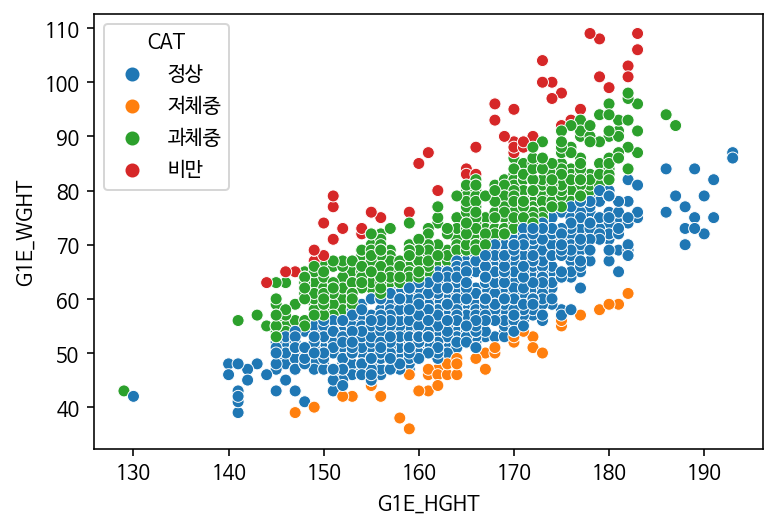

In [ ]:
#산점도 그래프
sns.scatterplot(x='G1E_HGHT', y='G1E_WGHT', hue='CAT', data=dfbmi)
plt.show()

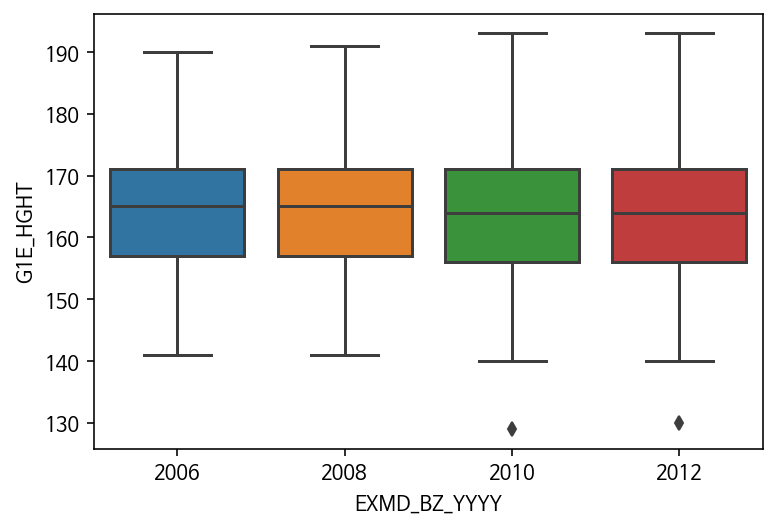

In [ ]:
#박스플롯 그래프
sns.boxplot(x='EXMD_BZ_YYYY', y='G1E_HGHT', data=dfbmi)
plt.show()

## 머신러닝

### 결측값 처리

+ 결측값 확인 
  + df.isnull() , df.isna() 
  + df.isnull().sum() : 결측치 개수 확인

+ 결측값 제거
  + 결측값이 있는 행 제거 : df.dropna()
  + 결측값이 있는 열 제거 : df.dropna(axis=1)

+ 결측값 채우기
  + 결측값을 특정 값으로 채우기 : df.fillna(특정값)
  + 결측값을 결측값의 앞 행의 값으로 채우기 : df.fillna(method='ffill') or df.fillna(method='pad')
  + 결측값을 결측값의 뒷 행의 값으로 채우기 : df.fillna(method='bfill') or df.fillna(method='backfill')
  + 결측값을 각 열의 평균 값으로 채우기 : df.fillna(df.mean())

In [ ]:
#결측치 확인 
dfbmi.isnull().sum()

EXMD_BZ_YYYY    0
G1E_HGHT        1
G1E_WGHT        1
G1E_FBS         0
BMI             1
CAT             0
dtype: int64

In [ ]:
#결측치 제거
dfbmi = dfbmi.dropna()
dfbmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1963
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   EXMD_BZ_YYYY  1963 non-null   category
 1   G1E_HGHT      1963 non-null   float64 
 2   G1E_WGHT      1963 non-null   float64 
 3   G1E_FBS       1963 non-null   int64   
 4   BMI           1963 non-null   float64 
 5   CAT           1963 non-null   object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 94.1+ KB


### train, test 데이터 나누기 

In [ ]:
train = dfbmi[dfbmi['EXMD_BZ_YYYY'] != 2012]
test = dfbmi[dfbmi['EXMD_BZ_YYYY'] == 2012]

## 회귀모델

In [ ]:
from sklearn.linear_model import LinearRegression
# 학습에 사용할 feature 선정, target 지정 
x = train[['G1E_HGHT',	'G1E_WGHT']]
y = train['BMI']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
pred = model.predict(test[['G1E_HGHT',	'G1E_WGHT']])
test['pred'] = pred
test

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_FBS,BMI,CAT,pred
3,2012,172.0,70.0,85,23.66,정상,23.584265
6,2012,159.0,47.0,101,18.59,정상,18.977382
17,2012,193.0,86.0,93,23.09,정상,23.335366
21,2012,163.0,66.0,120,24.84,정상,24.729692
24,2012,161.0,64.0,102,24.69,정상,24.580271
...,...,...,...,...,...,...,...
1949,2012,172.0,59.0,79,19.94,정상,19.585056
1952,2012,177.0,85.0,92,27.13,과체중,27.593463
1956,2012,172.0,73.0,101,24.68,정상,24.674959
1960,2012,157.0,49.0,90,19.88,정상,20.282218


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred, test['BMI'], squared = False)

0.37843831832487884

## 분류모델


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 학습에 사용할 feature 선정, target 지정 
x = train[['G1E_HGHT',	'G1E_WGHT']]
y = train['CAT']

# DecisionTreeClassifier 객체 생성
cmodel = DecisionTreeClassifier(random_state=11)

# 학습수행
cmodel.fit(x, y)

DecisionTreeClassifier(random_state=11)

In [ ]:
cpred = cmodel.predict(test[['G1E_HGHT','G1E_WGHT']])
test['cpred'] = cpred
test

,EXMD_BZ_YYYY,G1E_HGHT,G1E_WGHT,G1E_FBS,BMI,CAT,pred,cpred
3,2012,172.0,70.0,85,23.66,정상,23.584265,정상
6,2012,159.0,47.0,101,18.59,정상,18.977382,정상
17,2012,193.0,86.0,93,23.09,정상,23.335366,정상
21,2012,163.0,66.0,120,24.84,정상,24.729692,정상
24,2012,161.0,64.0,102,24.69,정상,24.580271,정상
...,...,...,...,...,...,...,...,...
1949,2012,172.0,59.0,79,19.94,정상,19.585056,정상
1952,2012,177.0,85.0,92,27.13,과체중,27.593463,과체중
1956,2012,172.0,73.0,101,24.68,정상,24.674959,정상
1960,2012,157.0,49.0,90,19.88,정상,20.282218,정상


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['CAT'], cpred) 

array([[155,   3,   0,   1],
       [  4,  16,   0,   0],
       [  0,   0,   8,   1],
       [  2,   0,   3, 325]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['CAT'], cpred))

              precision    recall  f1-score   support

         과체중       0.96      0.97      0.97       159
          비만       0.84      0.80      0.82        20
         저체중       0.73      0.89      0.80         9
          정상       0.99      0.98      0.99       330

    accuracy                           0.97       518
   macro avg       0.88      0.91      0.89       518
weighted avg       0.97      0.97      0.97       518

